In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('jk10s/covid_19_data.csv') 

In [3]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,03/04/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,03/04/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,03/04/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,03/04/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [4]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [5]:
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

In [6]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [7]:
 list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [8]:
jk = df[['ObservationDate',
 'Country/Region', 
 'Confirmed',
 'Deaths',
 'Recovered']]

In [9]:
jk

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


In [10]:
#suma todos los campos por indice de obsertiondate (fecha)
df_time = jk.groupby(['ObservationDate']).sum()

In [11]:
df_time.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


In [12]:
df1=df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [13]:
#confirmados - menos muertos para sacar casos activos
df2=df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [14]:
#resta los dos dataframe que coincidan en l amisma fecha
df1-df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [15]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


In [16]:
#diif resta cada dia con el dia previo es decir como aumentan los casos dia a dia
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


In [17]:
#promedio de casos durante un esos tres meses por dia
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

In [18]:
#se sacaa un diconario (1° registro) para usar su estructura en la siguinete celda
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [19]:
#fillna para uitar los nan qu estaban en la priera fila
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

In [20]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


In [21]:
#cumsum summa acomulativa lo que hace es deshacer todas las sumas que se realizaron
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


In [22]:
#suma de mes
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [23]:
#7 dias
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,2280.0,94.0,2942.0


In [24]:
#cada domingo
df_diff.resample('W-sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


In [25]:
#resample en series de timpo sacar valorres estadisticos
df_diff.resample('M').mean()


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,2277.750000,78.250000,2847.250000


In [26]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [27]:
#bfill copea el valor siguinete donde estaba el valor nulo
#ffill trae el valor previo para completar el valor nulo
#interpolate   interpoblar valor medios
#estas funiones lo que hacen es completar los valore nulos 

In [28]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,91576.5,3122.5,46915.5
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [29]:
#se crea una nueva columna  tasa de supervivencia al covid
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']

In [30]:
#quitar la vrible indice "observationdata" y ahora los indices los toma automaticmante con num
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


In [31]:
#gouppercompara series de tiempo el timepo no pertence al indice
#se saca el promdio por mes de la tasa de supervivencia por mes
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


In [53]:
#series de tiempo por dia 
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr



ObservationDate
2020-01-22    0.970198
2020-01-23    0.972416
2020-01-24    0.971893
2020-01-25    0.971617
2020-01-26    0.973103
2020-01-27    0.973470
2020-01-28    0.977017
2020-01-29    0.978658
2020-01-30    0.979045
2020-01-31    0.978524
2020-02-01    0.978470
2020-02-02    0.978473
2020-02-03    0.978800
2020-02-04    0.979457
2020-02-05    0.979549
2020-02-06    0.979340
2020-02-07    0.978885
2020-02-08    0.978066
2020-02-09    0.977145
2020-02-10    0.976016
2020-02-11    0.975188
2020-02-12    0.975853
2020-02-13    0.977274
2020-02-14    0.976884
2020-02-15    0.975684
2020-02-16    0.974985
2020-02-17    0.974195
2020-02-18    0.972952
2020-02-19    0.971586
2020-02-20    0.970560
2020-02-21    0.970206
2020-02-22    0.968731
2020-02-23    0.968294
2020-02-24    0.966800
2020-02-25    0.966235
2020-02-26    0.965976
2020-02-27    0.965962
2020-02-28    0.965847
2020-02-29    0.965881
2020-03-01    0.966032
2020-03-02    0.965871
2020-03-03    0.965921
2020-03-04    0.96

In [52]:
sr.shape

(43,)

<AxesSubplot:xlabel='ObservationDate'>

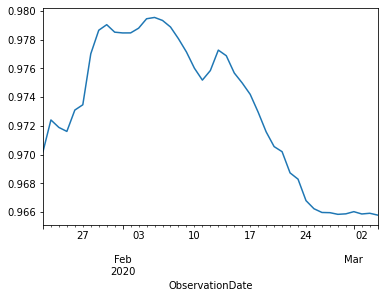

In [33]:
sr.plot()

<AxesSubplot:xlabel='ObservationDate'>

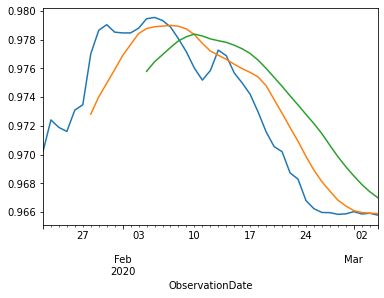

In [34]:
#rolling hacer promedios por  ventanas de frecuencia
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

<AxesSubplot:xlabel='ObservationDate'>

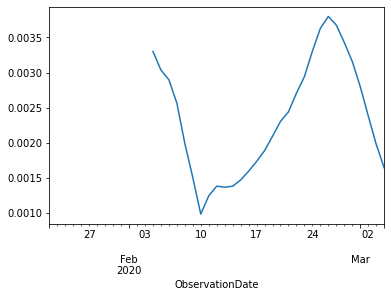

In [35]:
#rolling (suavisado de curva)ventans de frecuncia utilizando la desviacion stadar
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

In [ ]:
#reset df work new section

In [63]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,2020-03-04,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,2020-03-04,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,2020-03-04,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,2020-03-04,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [37]:
# cual pais tiene mas ocurrencias  ordenas
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [38]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [39]:
#indices el pais y la fecha  agrupandolos por suma por dia
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

SNo  Confirmed  Deaths  Recovered
Country/Region ObservationDate                                    
 Azerbaijan    2020-02-28       2664        1.0     0.0        0.0
Afghanistan    2020-02-24       2259        1.0     0.0        0.0
               2020-02-25       2352        1.0     0.0        0.0
               2020-02-26       2453        1.0     0.0        0.0
               2020-02-27       2557        1.0     0.0        0.0
...                              ...        ...     ...        ...
Vietnam        2020-02-29       2749       16.0     0.0       16.0
               2020-03-01       2870       16.0     0.0       16.0
               2020-03-02       2998       16.0     0.0       16.0
               2020-03-03       3141       16.0     0.0       16.0
               2020-03-04       3297       16.0     0.0       16.0

[1462 rows x 4 columns]

In [58]:
#filtra solo el pais de china
df_china = df_time.loc['Mainland China',:]
df_china

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,535,547.0,17.0,28.0
2020-01-23,1713,639.0,18.0,30.0
2020-01-24,3004,916.0,26.0,36.0
2020-01-25,4224,1399.0,42.0,39.0
2020-01-26,5548,2062.0,56.0,49.0
2020-01-27,6953,2863.0,82.0,58.0
2020-01-28,8478,5494.0,131.0,101.0
2020-01-29,10040,6070.0,133.0,120.0
2020-01-30,12064,8124.0,171.0,135.0


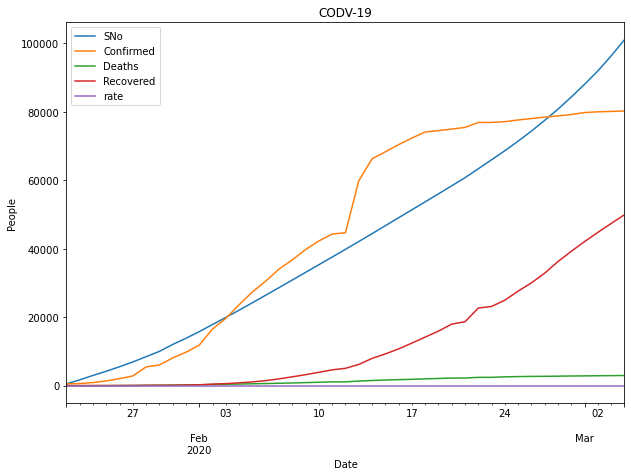

In [57]:
#grafica con la funcion plot size()  // importa matplotblib con caracterisicas xlabel and ylabel
df_china.plot(figsize = (10,7), title = 'CODV-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

<AxesSubplot:xlabel='ObservationDate'>

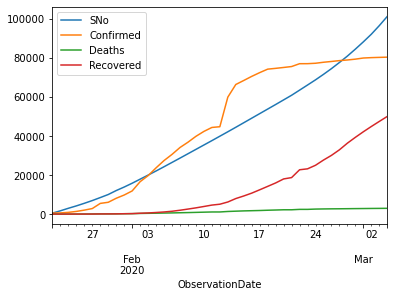

In [60]:
df_china.plot()

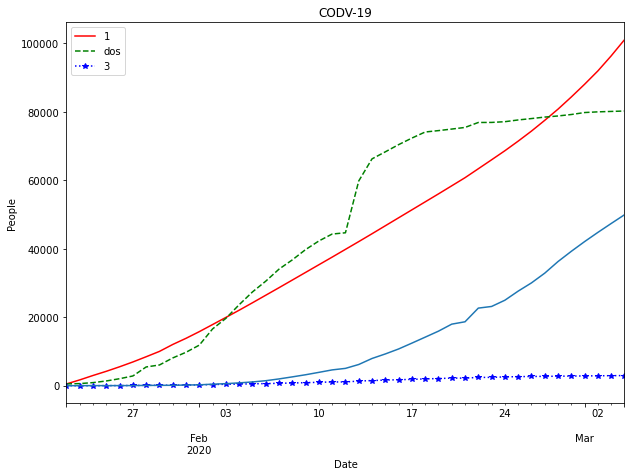

In [42]:
ax = df_china.plot(figsize = (10,7), title = 'CODV-19',
              legend = False,
              style = ['r-','g--','b:*'])
ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [43]:
df_monthly = df_china.resample('M').max()
df_monthly

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-31,13862,9783.0,213.0,214.0
2020-02-29,84373,79251.0,2835.0,39279.0
2020-03-31,101085,80271.0,2981.0,49955.0


<AxesSubplot:xlabel='ObservationDate'>

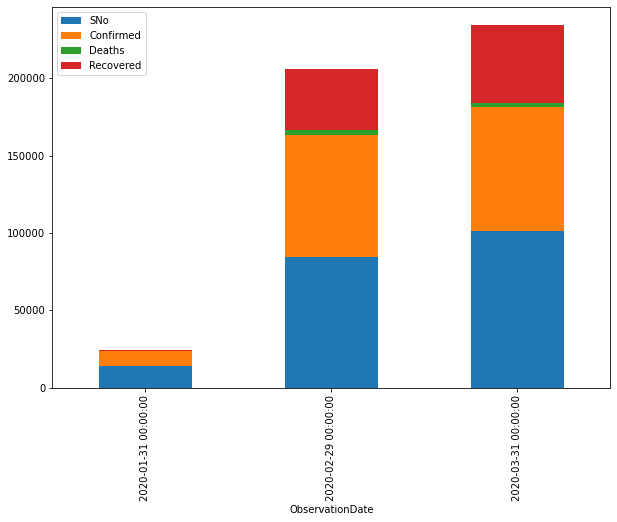

In [44]:
#especificar el grfico de barras con kind='bar'
df_monthly.plot(figsize = (10,7), kind='bar', stacked = True)

In [45]:
#se cre un anueva columna con los pasientes tratados es decir los confirmados resta los muertos los recuperados 
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,SNo,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,,
2020-01-31,13862,9783.0,213.0,214.0,9356.0
2020-02-29,84373,79251.0,2835.0,39279.0,37137.0
2020-03-31,101085,80271.0,2981.0,49955.0,27335.0


array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>], dtype=object)

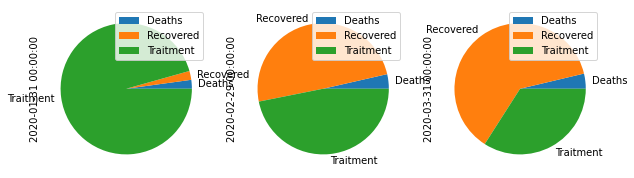

In [46]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (10,7), kind = 'pie', subplots=True)

/tmp/ipykernel_6303/88305345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']


<AxesSubplot:>

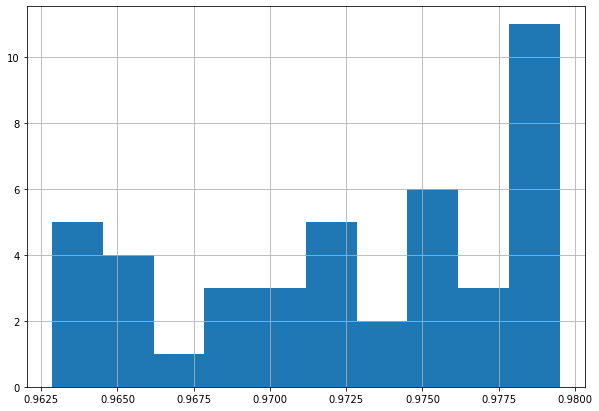

In [47]:
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].hist(figsize = (10,7), bins = 10)